# Titanic: Machine Learning From Disaster

The data is related with Titanic Disaster in 1912.
The classification goal is to predict if the Passenger Survived during the disaster.


# Importing Necessary Python Libraries for EDA, Data Processing, Feature Engineering, Data Modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

# Reading Train and Test Dataset

# Description of Data:
1. PassengerId - Passenger Id Number
2. Survived - Target Variable ( Passenger Survived (0) or Not Survived (1))
3. Pclass - Passenger Class of Travel ( 1, 2, 3 )
4. Name - Name of Passenger
5. Sex - Gender of Passenger (Male or Female)
6. Age - Age of Passenger
7. SibSp - Passenger Sibling or Spouse On board
8. Parch - Passenger Parents or Child on board
9. Ticket - Ticket Number
10. Fare - Ticket Fare
11. Cabin - Cabin Number
12. Embarked - Passenger Boarding Details ( S, C, Q )

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Observed columns Age, Cabin, Embarked have Null Values in Dataset.

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observed in train dataset , total 38% of people Survived during the disaster.

# Exploratory Data Analysis

Checking for Total No. Of Passenger Survived During the Disaster

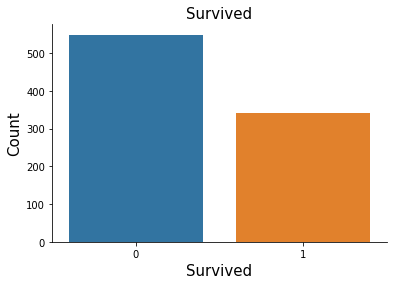

In [7]:
fig, ax = plt.subplots()
sns.countplot(x = 'Survived', data = train)
ax.set_xlabel('Survived', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Survived', fontsize=15)
sns.despine()

Checking for Outliers in Passenger Age

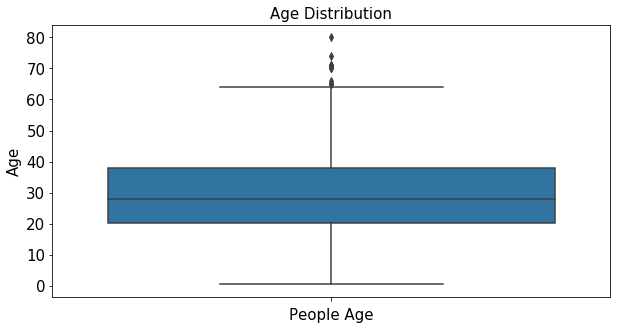

In [8]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
sns.boxplot(x = 'Age', data = train, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)


In [9]:
# Checking for Quantile Range for Passneger Age
Q1=train['Age'].quantile(q = 0.25)
Q2=train['Age'].quantile(q = 0.50)
Q3=train['Age'].quantile(q = 0.75)
Q4=train['Age'].quantile(q = 1.00)                        

IQR= Q3-Q1

print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)


print('Ages above: ', Q3 + 1.5*(IQR), 'are outliers')
print('Ages below: ', Q1 - 1.5*(IQR), 'are outliers')


1st Quartile:  20.125
2nd Quartile:  28.0
3rd Quartile:  38.0
4th Quartile:  80.0
IQR:  17.875
Ages above:  64.8125 are outliers
Ages below:  -6.6875 are outliers


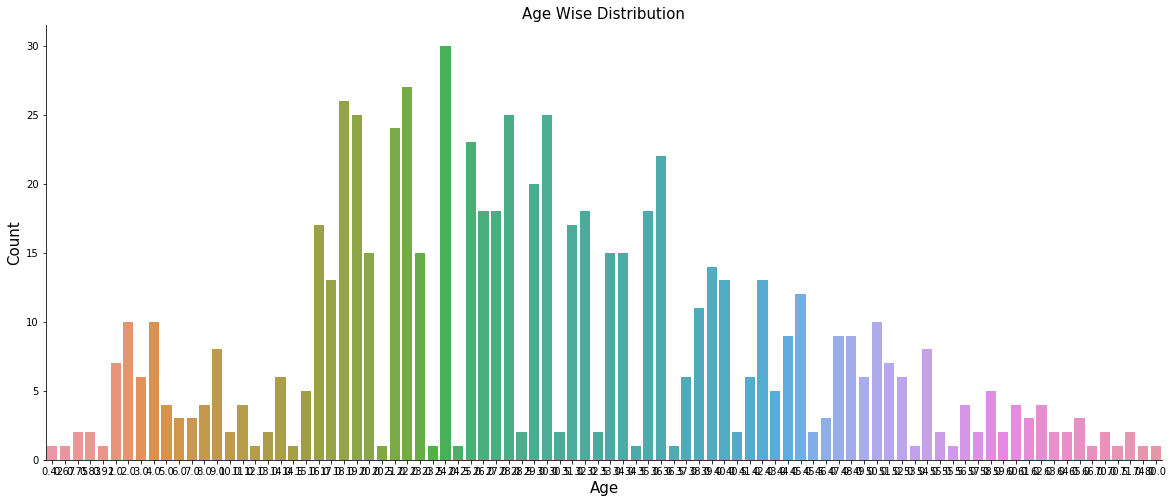

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'Age', data = train)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Wise Distribution', fontsize=15)
sns.despine()


Checking for No. Of Male or Female Survived during Disaster

Text(0.5, 1.0, 'Sex Vs No. of Passenger Survived')

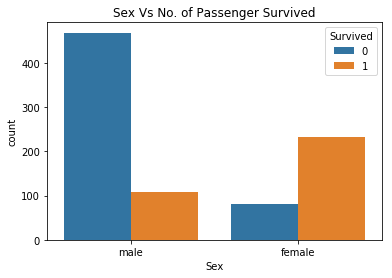

In [11]:
ageVsSur = sns.countplot(x='Sex',hue='Survived',data=train)
ageVsSur.set_title("Sex Vs No. of Passenger Survived")

Checking for No. of Passenger (Male or Female) of different Age survived during the Disaster

C:\Users\crk24\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\crk24\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Age Vs. Survival Rate for Males')

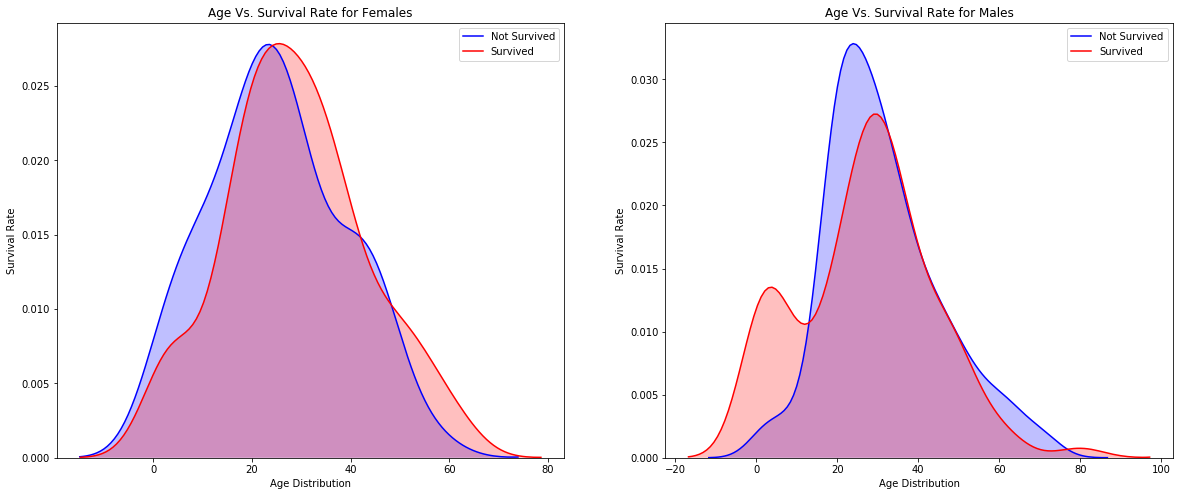

In [12]:
# Kernel Density Plot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
sns.kdeplot(train[train['Sex']=='female'].loc[(train['Survived'] == 0),'Age'] , color='b',shade=True,label='Not Survived',ax=ax1)
ax1=sns.kdeplot(train[train['Sex']=='female'].loc[(train['Survived'] == 1),'Age'] , color='r',shade=True, label='Survived',ax=ax1)
ax1.set(xlabel='Age Distribution', ylabel='Survival Rate')
ax1.set_title('Age Vs. Survival Rate for Females')

sns.kdeplot(train[train['Sex']=='male'].loc[(train['Survived'] == 0),'Age'] , color='b',shade=True,label='Not Survived',ax=ax2)
ax2=sns.kdeplot(train[train['Sex']=='male'].loc[(train['Survived'] == 1),'Age'] , color='r',shade=True, label='Survived',ax=ax2)
ax2.set(xlabel='Age Distribution', ylabel='Survival Rate')
plt.title('Age Vs. Survival Rate for Males')


Checking for No. Of Passenger Survived who where travelling in different Class.

Text(0.5, 1.0, 'Class of Travel Vs No. of Passenger Survived')

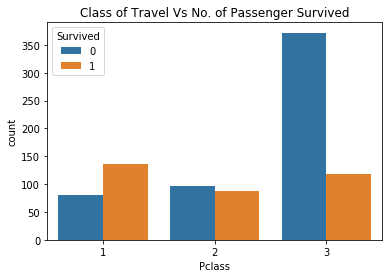

In [13]:
classVsSur = sns.countplot(x='Pclass',hue='Survived',data=train)
classVsSur.set_title("Class of Travel Vs No. of Passenger Survived")

Checking for No. of Passenger (Male or Female) travelling in Different class survived during the Disaster

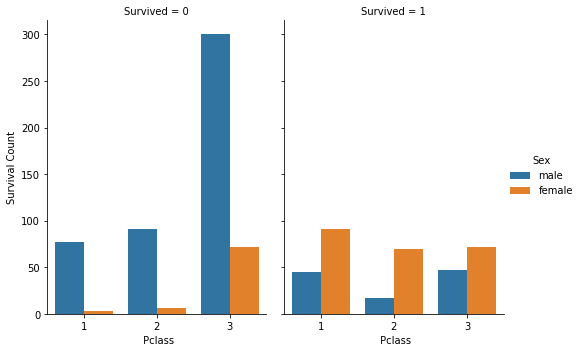

In [14]:
cat = sns.catplot(x="Pclass", hue="Sex", col="Survived",data=train, kind="count",height=5, aspect=.7);
cat.set_axis_labels(" Pclass", "Survival Count")

Checking for No. Of Siblings / Spouse / Parents / Child Onboard with Passenger who Survived the Disaster

Text(0.5, 1.0, 'Parch Vs. No. Of Passenger Survived')

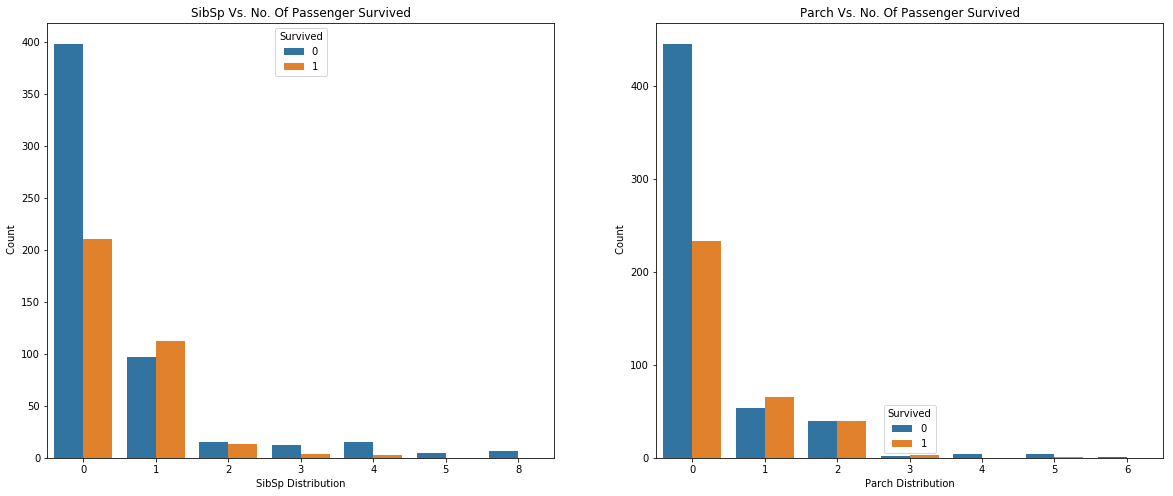

In [15]:

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
sns.countplot(x='SibSp',hue='Survived',data=train,ax=ax1)
ax1.set(xlabel='SibSp Distribution', ylabel=' Count')
ax1.set_title('SibSp Vs. No. Of Passenger Survived')

sns.countplot(x='Parch',hue='Survived',data=train,ax=ax2)
ax2.set(xlabel='Parch Distribution', ylabel=' Count')
ax2.set_title('Parch Vs. No. Of Passenger Survived')


Checking for No. of Passenger (Male or Female) boarded (Embarked) survived during the Disaster

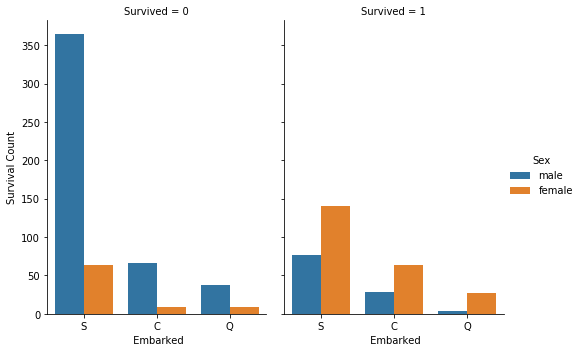

In [16]:
cat = sns.catplot(x="Embarked", hue="Sex", col="Survived",data=train, kind="count",height=5, aspect=.7);
cat.set_axis_labels(" Embarked", "Survival Count")

Creating new feature "Relative" : No.of Sibsp plus Parch travelling with the Passenger

In [17]:
train['Relative']= train['SibSp'] + train['Parch']
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relative
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


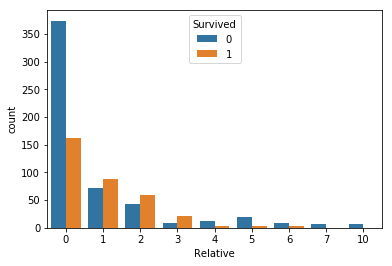

In [18]:
sns.countplot(x='Relative',hue='Survived',data=train)

Text(0.5, 1.0, 'Relative Vs. Survival Rate for Males')

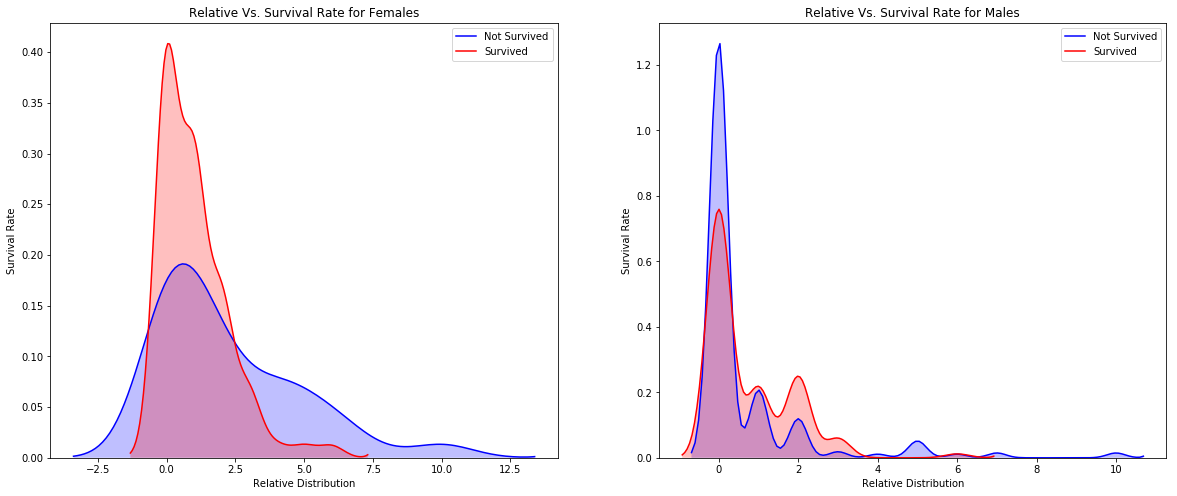

In [19]:
# Kernel Density Plot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
sns.kdeplot(train[train['Sex']=='female'].loc[(train['Survived'] == 0),'Relative'] , color='b',shade=True,label='Not Survived',ax=ax1)
ax1=sns.kdeplot(train[train['Sex']=='female'].loc[(train['Survived'] == 1),'Relative'] , color='r',shade=True, label='Survived',ax=ax1)
ax1.set(xlabel='Relative Distribution', ylabel='Survival Rate')
ax1.set_title('Relative Vs. Survival Rate for Females')

sns.kdeplot(train[train['Sex']=='male'].loc[(train['Survived'] == 0),'Relative'] , color='b',shade=True,label='Not Survived',ax=ax2)
ax2=sns.kdeplot(train[train['Sex']=='male'].loc[(train['Survived'] == 1),'Relative'] , color='r',shade=True, label='Survived',ax=ax2)
ax2.set(xlabel='Relative Distribution', ylabel='Survival Rate')
plt.title('Relative Vs. Survival Rate for Males')


# Missing Data

In [20]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True , ascending = False)
missing_value_df

,column_name,percent_missing
Cabin,Cabin,77.104377
Age,Age,19.865320
Embarked,Embarked,0.224467
PassengerId,PassengerId,0.000000
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
SibSp,SibSp,0.000000
Parch,Parch,0.000000


In [21]:
train['Embarked']=train['Embarked'].fillna('S') # Filling with Mode Value

In [22]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

Observed Cabin Column Value specify Cabin Deck No.. So, filling Missing Value with "N0" where "N" specifies Data Not Available.

In [23]:
#train['Cabin'] = train['Cabin'].fillna("N0")

Filling Missing Value of Age Column with values near to Mean Value but within one standard deviation

In [24]:
ageMean = train['Age'].mean()
ageStd = train['Age'].std()
ageCount = train['Age'].isnull().sum()
randomList = np.random.randint(ageMean - ageStd, ageMean + ageStd, size=ageCount)
train['Age'][np.isnan(train['Age'])] = randomList
train['Age'] = train['Age'].astype(int)

C:\Users\crk24\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# Data Processing

Creating Age Group for the Passenger Travelling

In [25]:
# functions to create bucketing in age - group

def age(df):
    df.loc[df['Age'] <= 16, 'Age'] = 1
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 2
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 3
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 4
    df.loc[(df['Age'] > 64), 'Age']=5
           
    return df

age(train);

# functions to create bucketing in fare - group

def fare(df):
    df.loc[df['Fare'] <= 8, 'Fare'] = 0
    df.loc[(df['Fare'] > 8) & (df['Fare'] <= 14), 'Fare'] = 1
    df.loc[(df['Fare'] > 14) & (df['Fare'] <= 30), 'Fare'] = 2
    df.loc[(df['Fare'] > 30), 'Fare']=3
           
    return df

fare(train);
train['Fare'] = train["Fare"].astype(int)

# Creating and Droping Feature

Adding New Feature: 

1.Relative - Passenger Relative travelling with them or not.


In [26]:
#train['Cabin_Deck'] = train['Cabin'].map(lambda x: x[0])
train['Relative'] = [0 if x<=1 else 1 for x in train['Relative']]

In [27]:
train = train.drop(["Name","PassengerId","Ticket","SibSp","Parch","Cabin"],axis = 1)

# One Hot Encoding to all Categorial Data

In [28]:
train=pd.get_dummies(train)
train.head()

,Survived,Pclass,Age,Fare,Relative,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,2,0,0,0,1,0,0,1
1,1,1,3,3,0,1,0,1,0,0
2,1,3,2,0,0,1,0,0,0,1
3,1,1,3,3,0,1,0,0,0,1
4,0,3,3,1,0,0,1,0,0,1


In [29]:
train.shape

(891, 10)

# Data Processing on Test Data 

In [30]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
test.shape

(418, 11)

In [32]:
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_df = pd.DataFrame({'column_name': test.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True , ascending = False)
missing_value_df

,column_name,percent_missing
Cabin,Cabin,78.229665
Age,Age,20.574163
Fare,Fare,0.239234
PassengerId,PassengerId,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000


In [33]:
# Filling Missing Values

#test['Embarked']=test['Embarked'].fillna(0) 

#test['Cabin'] = test['Cabin'].fillna("N0")

ageMean = test['Age'].mean()
ageStd = test['Age'].std()
ageCount = test['Age'].isnull().sum()
randomList = np.random.randint(ageMean - ageStd, ageMean + ageStd, size=ageCount)
test['Age'][np.isnan(test['Age'])] = randomList
test['Age'] = test['Age'].astype(int)

fareMean = test['Fare'].mean()
fareStd = test['Fare'].std()
fareCount = test['Fare'].isnull().sum()
randomList = np.random.randint(fareMean - fareStd, fareMean + fareStd, size=fareCount)
test['Fare'][np.isnan(test['Fare'])] = randomList
test['Fare'] = test['Fare'].astype(int)

C:\Users\crk24\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\crk24\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
# Creating Features

age(test) # Using Earlier Fuction for Creating Age Group on Test Data
fare(test) # Using Earlier Fuction for Creating fare Group on Test Data

#test['Cabin_Deck'] = test['Cabin'].map(lambda x: x[0])

test['Relative']= test['SibSp'] + test['Parch']
test['Relative'] = [0 if x<=1 else 1 for x in test['Relative']]

In [35]:
# Dropping Features
test = test.drop(["Name","Ticket","SibSp","Parch","Cabin"],axis = 1)

In [36]:
# One Hot Encoding on Categorial Data

test=pd.get_dummies(test)
test.head()

,PassengerId,Pclass,Age,Fare,Relative,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,3,0,0,0,1,0,1,0
1,893,3,3,0,0,1,0,0,0,1
2,894,2,4,1,0,0,1,0,1,0
3,895,3,2,0,0,0,1,0,0,1
4,896,3,2,1,1,1,0,0,0,1


In [37]:
test.shape

(418, 10)

In [38]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Relative', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [39]:
test.columns

Index(['PassengerId', 'Pclass', 'Age', 'Fare', 'Relative', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

# Feature Importance

In [40]:
X = train.loc[:, train.columns != 'Survived']
Y = train.loc[:, train.columns == 'Survived']

In [41]:
## Import the random forest model.

## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X, Y) 
## And score it on your testing data.
rf.score(X, Y)

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

C:\Users\crk24\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\crk24\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [42]:
feature_importances.head()

,importance
Sex_male,0.313803
Pclass,0.178984
Age,0.132835
Sex_female,0.127843
Fare,0.118227


# Data Modelling

In [43]:
X_train = train.loc[:, train.columns != 'Survived']
y_train = train.loc[:, train.columns == 'Survived'] 
X_test = test.loc[:, test.columns != 'PassengerId']


# Logistic Regression

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")


79.12 %


C:\Users\crk24\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\crk24\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Gaussian Naive Bayes

In [45]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")


77.55 %


C:\Users\crk24\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Linear SVC

In [46]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")


C:\Users\crk24\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


78.79 %


# Decision Tree

In [47]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")


86.31 %


# Random Forest

In [48]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

C:\Users\crk24\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


86.31 %


In [49]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 
              'Logistic Regression', 
              'Random Forest', 
              'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_linear_svc, 
              acc_log, 
              acc_random_forest, 
              acc_gaussian, 
              acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
86.31,Random Forest
86.31,Decision Tree
79.12,Logistic Regression
78.79,Support Vector Machines
77.55,Naive Bayes


In [50]:
df = pd.DataFrame( {"PassengerId":test["PassengerId"],"Survived": y_pred })
df = df.set_index('PassengerId')

df.to_csv('RandomForestFinal.csv')